In [ ]:
! pip install opencv-python matplotlib numpy

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Helper function to display images
def display_image(title, image, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
# 1. Intensity Transformation
def intensity_transformation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Intensity transformation (linear stretching)
    transformed_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    
    display_image('Original Image', image)
    display_image('Intensity Transformed Image', transformed_image)
    return transformed_image

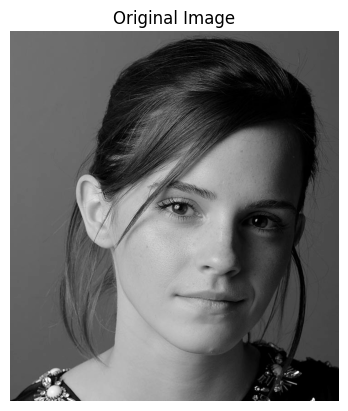

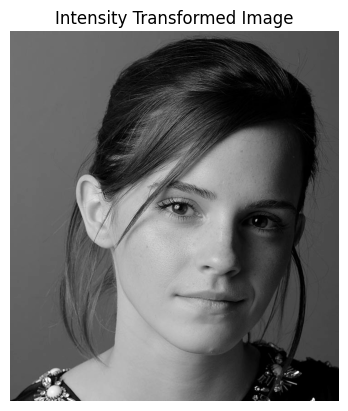

In [4]:
intensity_transformation('images/emma.jpg')

In [5]:
# 2. Accentuation of white and gray matter in brain image
def accentuate_brain(image_path):
    brain_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Applying transformations (mock example of accentuating gray/white matter)
    white_matter = cv2.normalize(brain_image, None, 150, 255, cv2.NORM_MINMAX)
    gray_matter = cv2.normalize(brain_image, None, 50, 150, cv2.NORM_MINMAX)
    
    display_image('Original Brain Image', brain_image)
    display_image('White Matter Accentuation', white_matter)
    display_image('Gray Matter Accentuation', gray_matter)

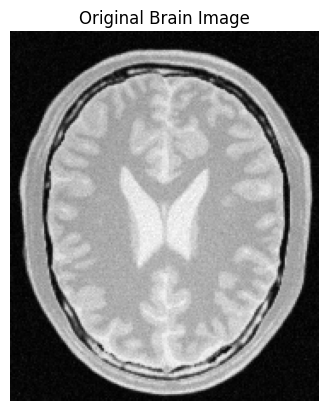

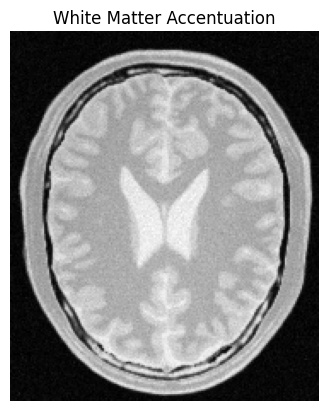

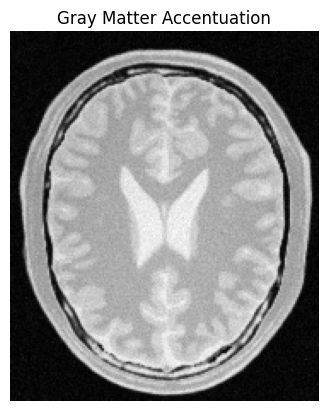

In [6]:
accentuate_brain('images/brain_proton_density_slice.png')

In [7]:
# 3. Gamma Correction
def gamma_correction(image_path, gamma_value=2.0):
    image = cv2.imread(image_path)
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    
    # Apply gamma correction on L plane
    l_plane = lab_image[:, :, 0]
    l_plane = np.power(l_plane / 255.0, gamma_value) * 255.0
    lab_image[:, :, 0] = l_plane.astype(np.uint8)
    
    corrected_image = cv2.cvtColor(lab_image, cv2.COLOR_Lab2BGR)
    
    # Show original and corrected images
    display_image('Original Image', image, cmap=None)
    display_image(f'Gamma Corrected Image (gamma={gamma_value})', corrected_image, cmap=None)

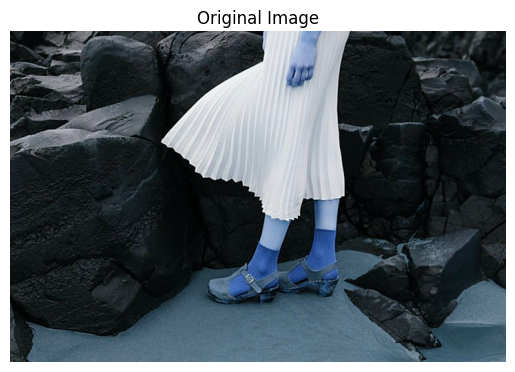

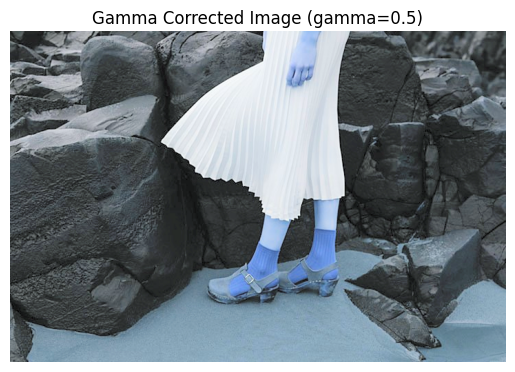

In [8]:
gamma_correction('images/highlights_and_shadows.jpg', gamma_value=0.5)

In [9]:
# 4. Vibrance Enhancement
def vibrance_enhancement(image_path, a=0.5, sigma=70):
    image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Apply intensity transformation to saturation plane
    x = hsv_image[:, :, 1]
    transformation = np.minimum(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)
    hsv_image[:, :, 1] = transformation.astype(np.uint8)
    
    # Recombine planes and display result
    enhanced_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    display_image('Original Image', image, cmap=None)
    display_image('Vibrance Enhanced Image', enhanced_image, cmap=None)

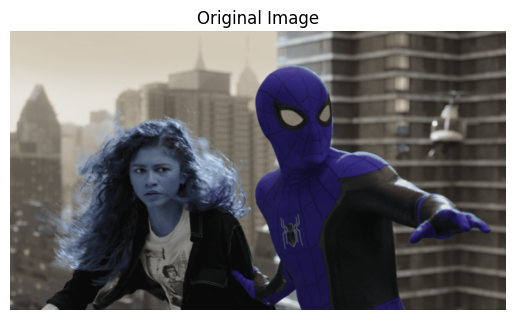

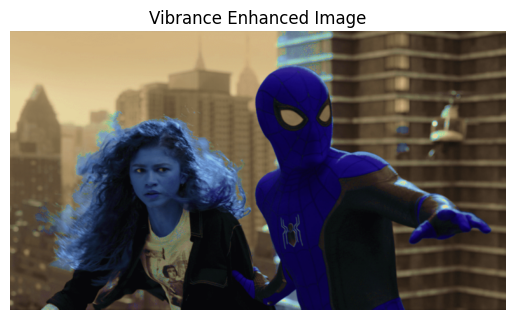

In [15]:
vibrance_enhancement('images/spider.png')

In [12]:
# 5. Histogram Equalization
def histogram_equalization(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Histogram Equalization
    equalized_image = cv2.equalizeHist(image)
    
    # Show original and equalized histograms
    display_image('Original Image', image)
    display_image('Equalized Image', equalized_image)

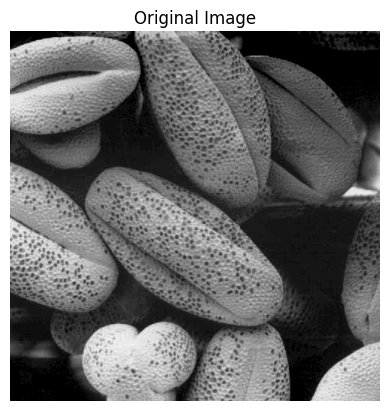

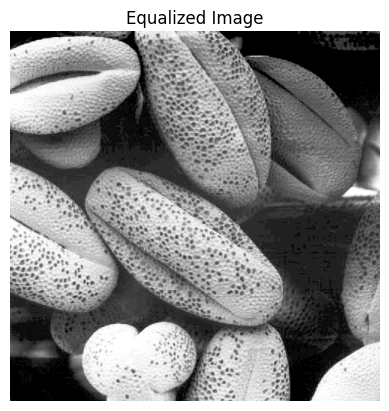

In [16]:
histogram_equalization('images/shells.tif')

In [14]:

# 6. Histogram Equalization on Foreground
def histogram_equalization_foreground(image_path):
    image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Extract hue, saturation, and value planes
    h_plane, s_plane, v_plane = cv2.split(hsv_image)
    
    # Create a mask for the foreground
    _, mask = cv2.threshold(v_plane, 127, 255, cv2.THRESH_BINARY)
    
    # Apply bitwise_and to isolate the foreground
    foreground = cv2.bitwise_and(v_plane, v_plane, mask=mask)
    
    # Histogram Equalization on foreground
    equalized_foreground = cv2.equalizeHist(foreground)
    
    # Combine equalized foreground with background
    final_image = cv2.merge([h_plane, s_plane, equalized_foreground])
    
    display_image('Original Image', image, cmap=None)
    display_image('Histogram Equalized Foreground', equalized_foreground, cmap=None)

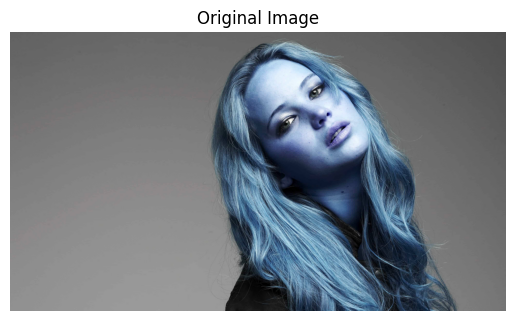

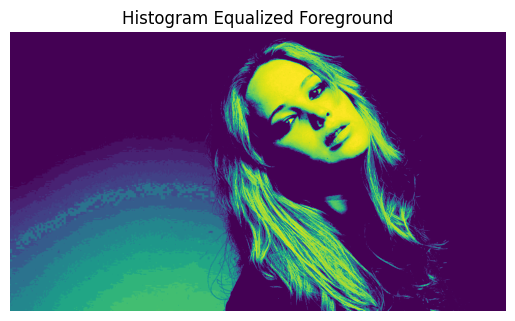

In [17]:
histogram_equalization_foreground('images/jeniffer.jpg')

In [18]:
# 7. Sobel Filtering
def sobel_filtering(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Using filter2D with Sobel
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_filtered = cv2.sqrt(sobel_x**2 + sobel_y**2)
    
    display_image('Original Image', image)
    display_image('Sobel Filtered Image', sobel_filtered)

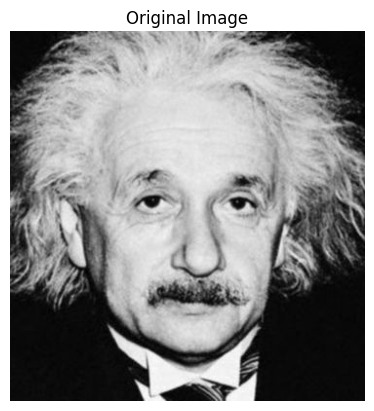

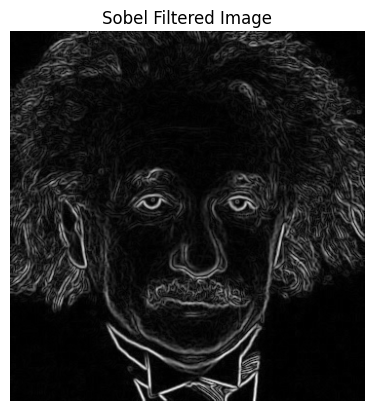

In [19]:
sobel_filtering('images/einstein.png')

In [20]:

# 8. Image Zooming
def zoom_image(image_path, scale, method='bilinear'):
    image = cv2.imread(image_path)
    
    if method == 'bilinear':
        zoomed_image = cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    else:
        zoomed_image = cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_NEAREST)
    
    display_image('Original Image', image, cmap=None)
    display_image(f'Zoomed Image (Method: {method})', zoomed_image, cmap=None)

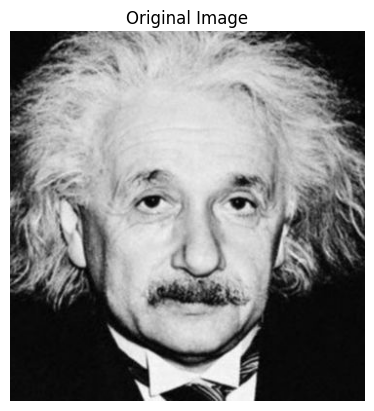

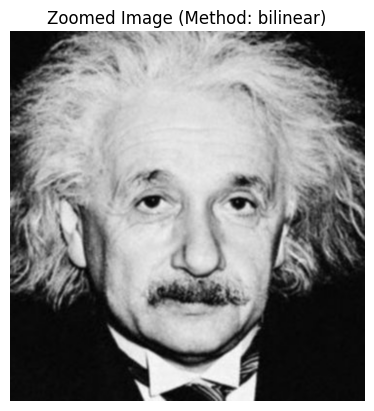

In [22]:
zoom_image('images/einstein.png', scale=2, method='bilinear')

In [23]:

# 9. Image Segmentation with GrabCut
def grabcut_segmentation(image_path):
    image = cv2.imread(image_path)
    mask = np.zeros(image.shape[:2], np.uint8)
    
    # Define initial bounding box for segmentation
    rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)
    
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    
    # Apply GrabCut
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    
    # Extract foreground and background
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    foreground = image * mask2[:, :, np.newaxis]
    background = image * (1 - mask2[:, :, np.newaxis])
    
    display_image('Original Image', image, cmap=None)
    display_image('Foreground', foreground, cmap=None)
    display_image('Background', background, cmap=None)

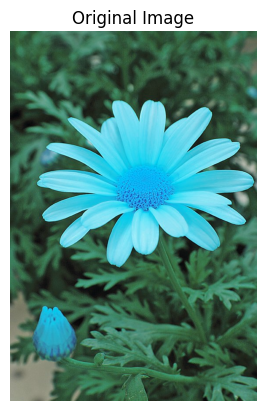

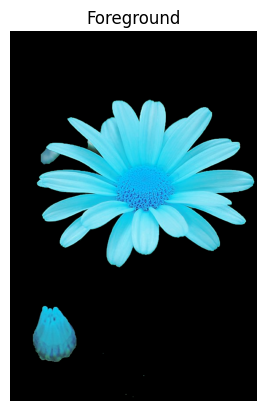

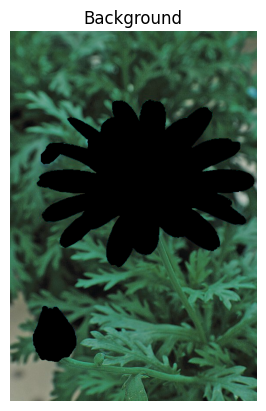

In [24]:
grabcut_segmentation('images/daisy.jpg')